# Bus241 datasets: Wine quality data example
* Source:  ML repository
* Wine quality by experts (0 - 10)
* Predictors:  Wine chemical composition
* This can be done as either classification, or regression


# I. Import Basic Packages

In [220]:
# basics
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
# Generate many test/train splits
# A monte-carlo for cross validation
# This is how we should measure performance
# Note:  This will work with any model
# Quoted from BUS241 course notebook
def MCtraintest(nmc,X,y,modelObj,testFrac):
    # Create memory space for monte-carlo runs
    trainScore = np.zeros(nmc)
    testScore  = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=testFrac)
        modelObj.fit(X_train,y_train)
        trainScore[i] = modelObj.score(X_train,y_train)
        testScore[i]  = modelObj.score(X_test,y_test)
    return trainScore,testScore

# II. Read and Verify Data

**Define Data Cleaning Pipeline:**

This pipeline is quoted from https://towardsdatascience.com/cleaner-data-analysis-with-pandas-using-pipes-4d73770fbf3c. I quoted some of these, and also modified and edited this pipeline based on what I need for the cleaning.

In [28]:
def copy_df(df):
    return df.copy()

# if we have a column that contains more than half NaN values, we chose to drop it
def drop_null(df):
    threshold = len(df) * 0.5
    df = df.dropna(axis = 1, thresh = threshold)
    return df

# one way to deal with missing values
def median_inpute(df, columns):
    median = df[columns].median()
    df = df.fillna(median)
    return df
        
# here we select data only within 0.05 and 0.95 quantile
def remove_outliers(df, column):
    low = df[column].mean() - 3 * df[column].std()
    high = df[column].mean() + 3 * df[column].std()
    return df[df[column].between(low, high, inclusive = True)]

# change "object" to "category" dtype to save memory space
def to_category(df):
    cols = df.select_dtypes(include="object").columns
    for c in cols:
        cat_ratio = len(df[c].value_counts()) / len(df)
        if cat_ratio < 0.05:
            df[c] = df[c].astype("category")
    return df

### 1. Read Data

In [29]:
# Loading dataset
wineall = pd.read_csv('winequality-red.csv')

### 2. Verify Data

In [30]:
wineall.head()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
#Checking more detail information about the data
wineall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedAcidity        1599 non-null   float64
 1   volatileAcidity     1599 non-null   float64
 2   citricAcid          1599 non-null   float64
 3   residualSugar       1599 non-null   float64
 4   chlorides           1599 non-null   float64
 5   freeSulfurDioxide   1599 non-null   float64
 6   totalSulfurDioxide  1599 non-null   float64
 7   density             1599 non-null   float64
 8   pH                  1599 non-null   float64
 9   sulphates           1599 non-null   float64
 10  alcohol             1599 non-null   float64
 11  quality             1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [32]:
wineall.shape

(1599, 12)

### 3. Handle Missing Data

In [34]:
wineall.isnull().sum()

fixedAcidity          0
volatileAcidity       0
citricAcid            0
residualSugar         0
chlorides             0
freeSulfurDioxide     0
totalSulfurDioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

### 4. Inspect Outliers

In [35]:
quant_list = wineall.columns.tolist()[:-1]
quant_list

['fixedAcidity',
 'volatileAcidity',
 'citricAcid',
 'residualSugar',
 'chlorides',
 'freeSulfurDioxide',
 'totalSulfurDioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

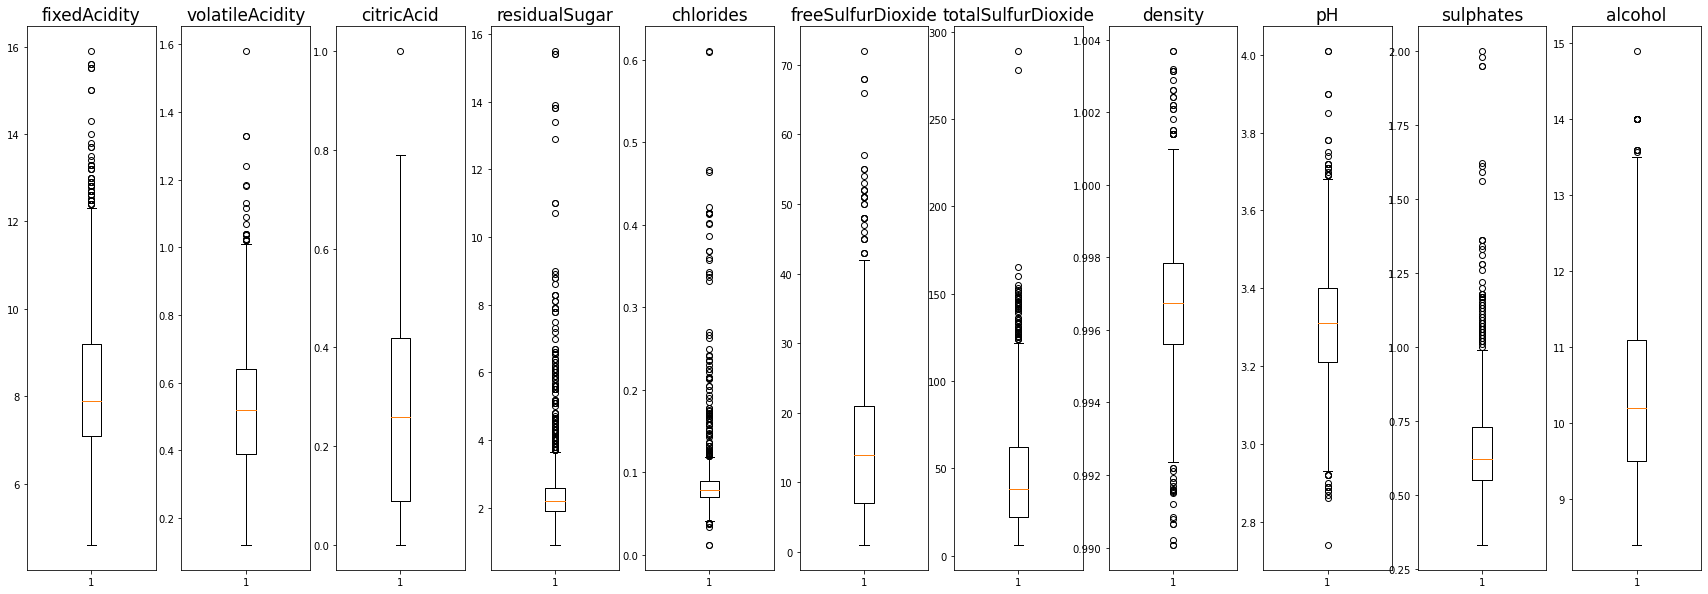

In [36]:
plt.figure(figsize=(30,10))

for i in range(len(quant_list)):
    plt.subplot(1, len(quant_list), i+1) 
    plt.boxplot(wineall[quant_list[i]]) 
    plt.title(quant_list[i],fontsize=17)
    
plt.show()

In [37]:
wineall = (wineall.pipe(copy_df).
              pipe(remove_outliers, quant_list[0]).
              pipe(remove_outliers, quant_list[1]).
              pipe(remove_outliers, quant_list[2]).
              pipe(remove_outliers, quant_list[3]).
              pipe(remove_outliers, quant_list[4]).
              pipe(remove_outliers, quant_list[5]).
              pipe(remove_outliers, quant_list[6]).
              pipe(remove_outliers, quant_list[7]).
              pipe(remove_outliers, quant_list[8]).
              pipe(remove_outliers, quant_list[9]).
              pipe(remove_outliers, quant_list[10]))

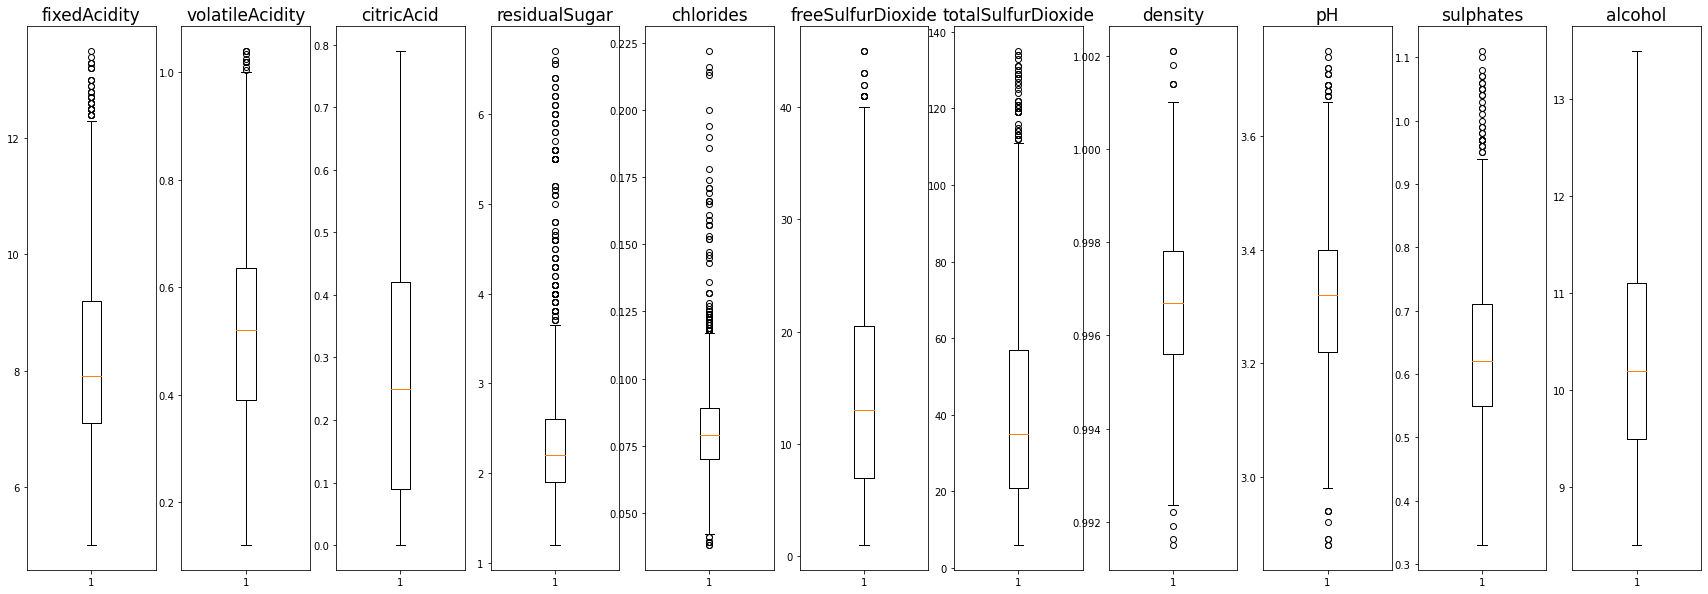

In [38]:
plt.figure(figsize=(30,10))

for i in range(len(quant_list)):
    plt.subplot(1, len(quant_list), i+1) 
    plt.boxplot(wineall[quant_list[i]]) 
    plt.title(quant_list[i],fontsize=17)
    
plt.show()

In [39]:
wineall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedAcidity        1431 non-null   float64
 1   volatileAcidity     1431 non-null   float64
 2   citricAcid          1431 non-null   float64
 3   residualSugar       1431 non-null   float64
 4   chlorides           1431 non-null   float64
 5   freeSulfurDioxide   1431 non-null   float64
 6   totalSulfurDioxide  1431 non-null   float64
 7   density             1431 non-null   float64
 8   pH                  1431 non-null   float64
 9   sulphates           1431 non-null   float64
 10  alcohol             1431 non-null   float64
 11  quality             1431 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 145.3 KB


### 5. Set Up Binary Classifier

Define quality > 6.5 as good quality (=1), and the rest as poor quality (=0).

In [40]:
# Define quality > 6.5 as good quality
ybin = wineall['quality'] > 6.5
print(np.mean(ybin))
wineall['goodqual'] = ybin

0.13487071977638015


### 6. Data Visualization and Analysis

In [189]:
wineall.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixedAcidity,1431.0,8.310692,1.645746,5.0000,7.1000,7.9000,9.2000,13.5000
volatileAcidity,1431.0,0.524018,0.169816,0.1200,0.3900,0.5200,0.6350,1.0400
citricAcid,1431.0,0.264018,0.191504,0.0000,0.0900,0.2500,0.4200,0.7900
residualSugar,1431.0,2.387456,0.862736,1.2000,1.9000,2.2000,2.6000,6.7000
chlorides,1431.0,0.081379,0.020627,0.0380,0.0700,0.0790,0.0890,0.2220
freeSulfurDioxide,1431.0,14.938505,9.176002,1.0000,7.0000,13.0000,20.5000,45.0000
totalSulfurDioxide,1431.0,42.587701,27.807892,6.0000,21.0000,35.0000,57.0000,135.0000
density,1431.0,0.996717,0.001700,0.9915,0.9956,0.9967,0.9978,1.0021
pH,1431.0,3.316939,0.140902,2.8800,3.2200,3.3200,3.4000,3.7500
sulphates,1431.0,0.640699,0.126753,0.3300,0.5500,0.6200,0.7100,1.1100


#### Goodqual Barchart:

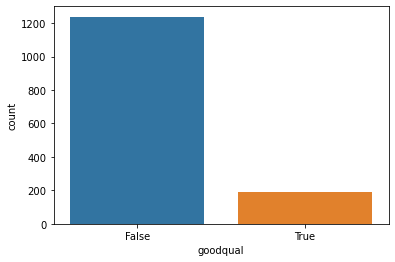

In [43]:
# Plot the distribution of "goodqual" wine
sns.countplot(wineall['goodqual'])

In [165]:
wine_column = wineall.columns.to_list()
wine_column

['fixedAcidity',
 'volatileAcidity',
 'citricAcid',
 'residualSugar',
 'chlorides',
 'freeSulfurDioxide',
 'totalSulfurDioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'goodqual']

Text(0.5, 1.0, 'citricAcid')

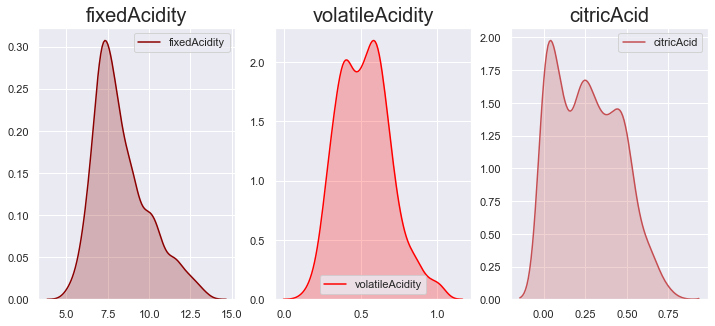

In [135]:
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1) 
sns.kdeplot(wineall['fixedAcidity'], shade=True, color="darkred")
plt.title('fixedAcidity',fontsize=20) 

plt.subplot(1, 3, 2) 
sns.kdeplot(wineall['volatileAcidity'], shade=True, color="red")
plt.title('volatileAcidity',fontsize=20) 

plt.subplot(1, 3, 3) 
sns.kdeplot(wineall['citricAcid'], shade=True, color="r")
plt.title('citricAcid',fontsize=20)

Text(0.5, 1.0, 'freeSulfurDioxide')

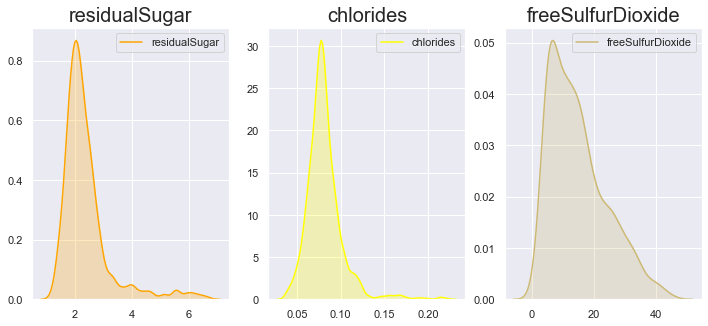

In [141]:
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1) 
sns.kdeplot(wineall['residualSugar'], shade=True, color="orange")
plt.title('residualSugar',fontsize=20) 

plt.subplot(1, 3, 2) 
sns.kdeplot(wineall['chlorides'], shade=True, color="yellow")
plt.title('chlorides',fontsize=20) 

plt.subplot(1, 3, 3) 
sns.kdeplot(wineall['freeSulfurDioxide'], shade=True, color="y")
plt.title('freeSulfurDioxide',fontsize=20)

Text(0.5, 1.0, 'pH')

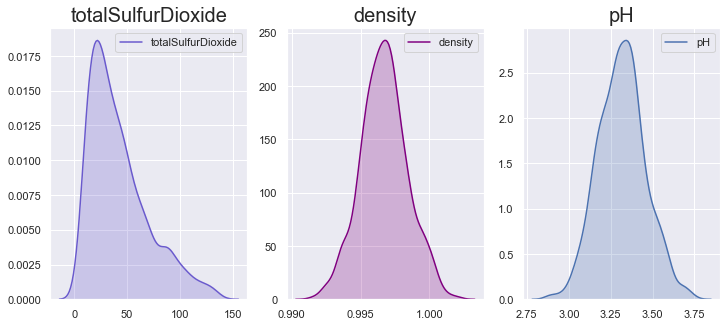

In [140]:
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1) 
sns.kdeplot(wineall['totalSulfurDioxide'], shade=True, color="slateblue")
plt.title('totalSulfurDioxide',fontsize=20) 

plt.subplot(1, 3, 2) 
sns.kdeplot(wineall['density'], shade=True, color="purple")
plt.title('density',fontsize=20) 

plt.subplot(1, 3, 3) 
sns.kdeplot(wineall['pH'], shade=True, color="b")
plt.title('pH',fontsize=20)

Text(0.5, 1.0, 'quality')

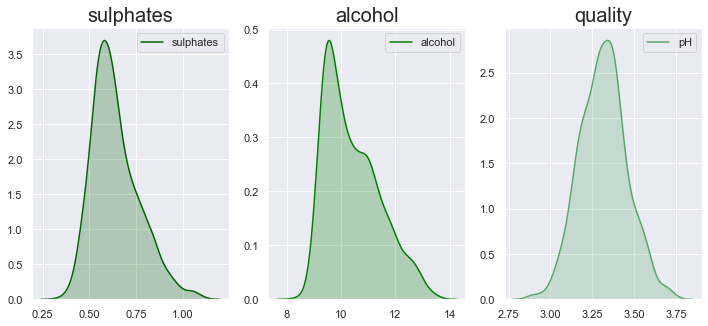

In [142]:
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1) 
sns.kdeplot(wineall['sulphates'], shade=True, color="darkgreen")
plt.title('sulphates',fontsize=20) 

plt.subplot(1, 3, 2) 
sns.kdeplot(wineall['alcohol'], shade=True, color="green")
plt.title('alcohol',fontsize=20) 

plt.subplot(1, 3, 3) 
sns.kdeplot(wineall['pH'], shade=True, color="g")
plt.title('quality',fontsize=20)

#### Pairwise Relationship

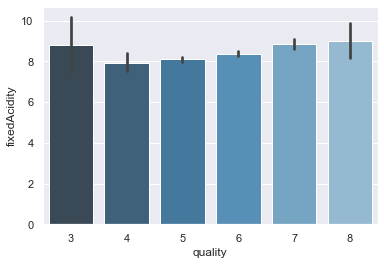

In [113]:
# Plot the relationship between quality and fixedAcidity
sns.barplot(x = 'quality', y = 'fixedAcidity', data = wineall, palette="Blues_d")

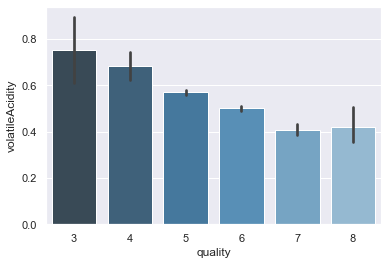

In [114]:
# Plot the relationship between quality and volatileAcidity
sns.barplot(x = 'quality', y = 'volatileAcidity', data = wineall, palette="Blues_d")

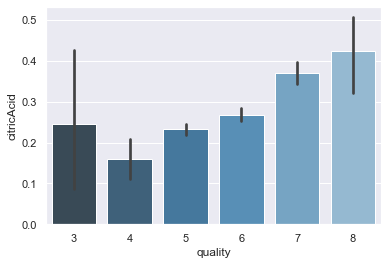

In [115]:
# Plot the relationship between quality and citricAcid
sns.barplot(x = 'quality', y = 'citricAcid', data = wineall, palette="Blues_d")

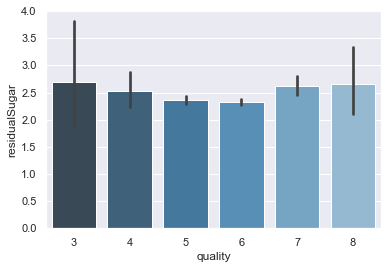

In [116]:
# Plot the relationship between quality and residualSugar
sns.barplot(x = 'quality', y = 'residualSugar', data = wineall, palette="Blues_d")

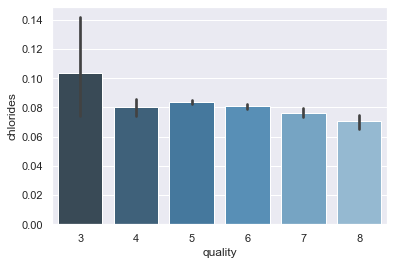

In [117]:
# Plot the relationship between quality and chlorides
sns.barplot(x = 'quality', y = 'chlorides', data = wineall, palette="Blues_d")

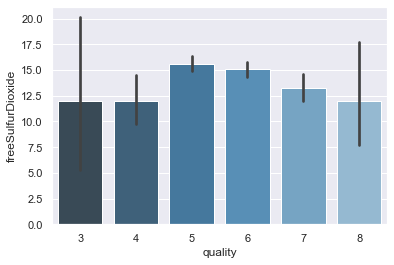

In [118]:
# Plot the relationship between quality and freeSulfurDioxide
sns.barplot(x = 'quality', y = 'freeSulfurDioxide', data = wineall, palette="Blues_d")

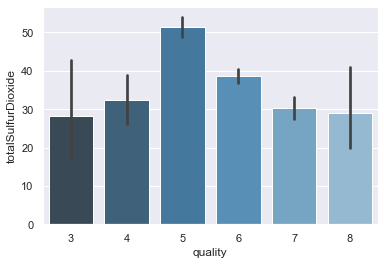

In [119]:
# Plot the relationship between quality and totalSulfurDioxide
sns.barplot(x = 'quality', y = 'totalSulfurDioxide', data = wineall, palette="Blues_d")

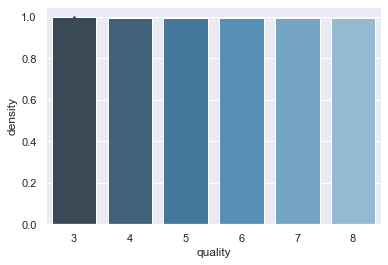

In [120]:
# Plot the relationship between quality and density
sns.barplot(x = 'quality', y = 'density', data = wineall, palette="Blues_d")

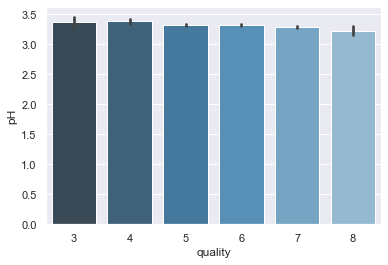

In [121]:
# Plot the relationship between quality and pH
sns.barplot(x = 'quality', y = 'pH', data = wineall, palette="Blues_d")

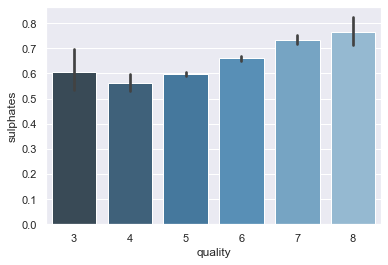

In [122]:
# Plot the relationship between quality and sulphates
sns.barplot(x = 'quality', y = 'sulphates', data = wineall, palette="Blues_d")

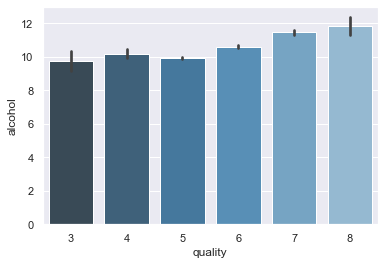

In [123]:
# Plot the relationship between quality and alcohol
sns.barplot(x = 'quality', y = 'alcohol', data = wineall, palette="Blues_d")

In [48]:
wineall.corr().style.background_gradient()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality,goodqual
fixedAcidity,1.000000,-0.306366,0.700109,0.162761,0.187754,-0.147458,-0.102858,0.654050,-0.702895,0.213094,-0.003372,0.139373,0.127630
volatileAcidity,-0.306366,1.000000,-0.595703,0.029931,0.060373,0.009691,0.105180,-0.010116,0.260406,-0.348036,-0.206550,-0.363495,-0.266701
citricAcid,0.700109,-0.595703,1.000000,0.170748,0.104875,-0.077671,0.000973,0.367649,-0.518027,0.303163,0.175982,0.240377,0.226815
residualSugar,0.162761,0.029931,0.170748,1.000000,0.125239,0.005004,0.110947,0.333367,-0.065859,0.073164,0.171213,0.044278,0.107269
chlorides,0.187754,0.060373,0.104875,0.125239,1.000000,-0.054352,0.053213,0.323629,-0.183580,0.035601,-0.194123,-0.122765,-0.103790
freeSulfurDioxide,-0.147458,0.009691,-0.077671,0.005004,-0.054352,1.000000,0.654102,-0.038066,0.118089,0.060060,-0.065172,-0.045363,-0.076751
totalSulfurDioxide,-0.102858,0.105180,0.000973,0.110947,0.053213,0.654102,1.000000,0.129233,0.007723,-0.042090,-0.257147,-0.210413,-0.176584
density,0.654050,-0.010116,0.367649,0.333367,0.323629,-0.038066,0.129233,1.000000,-0.298971,0.144962,-0.457625,-0.176150,-0.149850
pH,-0.702895,0.260406,-0.518027,-0.065859,-0.183580,0.118089,0.007723,-0.298971,1.000000,-0.040382,0.121295,-0.095001,-0.086264
sulphates,0.213094,-0.348036,0.303163,0.073164,0.035601,0.060060,-0.042090,0.144962,-0.040382,1.000000,0.232635,0.381907,0.300392


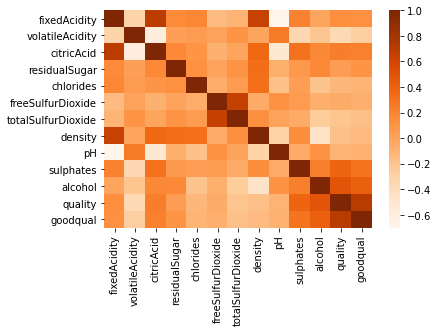

In [44]:
sns.heatmap(wineall.corr(), cmap="Oranges")

# III. Data Preprocessing

### Feature Selection:

In [197]:
# Drop the 'goodqual' and 'quality' from wineall and define it as X
# Define 'goodqual' as y
X_all = wineall.drop(['quality','goodqual','fixedAcidity','residualSugar','density','pH'], axis = 1)
y_all = wineall['goodqual']

In [198]:
X_all.shape

(1431, 7)

In [199]:
# Plot some information about the y
y_all.shape

(1431,)

###  Create Unseen Data:

In [200]:
X_all.shape[0] * 0.75

1073.25

In [201]:
# load default data set
X = X_all[:1073]
y = y_all[:1073]

# Unseen data
X_unseen = X_all[1073:]
y_unseen = y_all[1073:]

In [202]:
X_column = X.columns

### Standardization:

In [203]:
# preprocessing
from sklearn.preprocessing import StandardScaler

# transform the entire X
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [204]:
# change X back to dataframe with columns names
X = pd.DataFrame(X)
X.columns = X_column

In [205]:
X.head()

,volatileAcidity,citricAcid,chlorides,freeSulfurDioxide,totalSulfurDioxide,sulphates,alcohol
0,1.082845,-1.474345,-0.335145,-0.370570,-0.316199,-0.676994,-0.938414
1,2.143181,-1.474345,0.702011,1.179180,0.841161,0.270606,-0.555628
2,1.436291,-1.268298,0.419151,0.072216,0.385231,0.033706,-0.555628
3,-1.391273,1.410303,-0.382288,0.293609,0.595660,-0.519061,-0.555628
4,1.082845,-1.474345,-0.335145,-0.370570,-0.316199,-0.676994,-0.938414


# IV. Classification Models

In [224]:
# keep the output identical at every run
np.random.seed(42)

### Naive Benchmark

In [225]:
np.mean(ybin)

0.13487071977638015

In [226]:
1-np.mean(ybin)

0.8651292802236199

### Train test split

In [227]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Create a list to store result:

In [489]:
result = []

## 1. Naive Bayes

In [490]:
# Try a naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

model =  GaussianNB()
model.fit(X_train,y_train)
trainScore = model.score(X_train,y_train)
testScore = model.score(X_test,y_test)
print("Training set accuracy: ", trainScore.round(5))
print("Testing  set accuracy: ", testScore.round(5))

Training set accuracy:  0.84965
Testing  set accuracy:  0.85116


In [491]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [492]:
y_pred = model.predict(X_test)
                     
cmat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cmat.ravel()
cmat

array([[165,  17],
       [ 15,  18]])

In [493]:
# precision
precision = tp / (tp + fp) # or use precision_score(y_test, y_test_pred)
precision

0.5142857142857142

In [494]:
# recall
recall = tp / (tp + fn) # or use recall_score(y_test, y_test_pred)
recall

0.5454545454545454

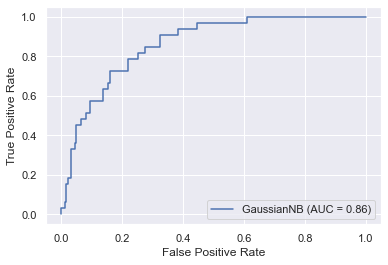

In [495]:
plot_roc_curve(model, X_test, y_test)  
plt.show() 

#### Cross Validation Machinery:

In [496]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [497]:
# cross validation machinery
# These are some new scikit learn toys that will make your life easier (see below)

naive_bayes =  GaussianNB()
# Set up train/test simulation and store in cvf
cvf = ShuffleSplit(n_splits=25, test_size=0.2)
# Simuate scores:  returns vector, note cv argument
scores = cross_val_score(model, X, y, cv=cvf)
print("Mean Test Score:", np.mean(scores).round(5))
print("Std:", np.std(scores).round(5))

Mean Test Score: 0.84353
Std: 0.02008


In [498]:
result.append({"Model": "Naive Bayes", "Test_Score": np.mean(scores).round(5)})

## 2. Linear Discriminant

In [499]:
# Let's try a linear separation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ld = LinearDiscriminantAnalysis()

# Simuate scores:  returns vector, note cv argument
scores = cross_val_score(ld, X, y, cv=cvf)
print("Mean Test Score:", np.mean(scores).round(5))
print("Std:", np.std(scores).round(5))

Mean Test Score: 0.86605
Std: 0.02025


In [500]:
result.append({"Model": "Linear Discriminant", "Test_Score": np.mean(scores).round(5)})

## 3. Logistic

In [501]:
from sklearn.linear_model import LogisticRegression

#### Without Penalty:

In [502]:
lr = LogisticRegression(penalty="none",solver="lbfgs",max_iter=1000)

trainS, testS = MCtraintest(500,X,y,lr,0.20)
print("Mean training accuracy: ", np.mean(trainS).round(5))
print("Mean testing accuracy: ", np.mean(testS).round(5))

Mean training accuracy:  0.88046
Mean testing accuracy:  0.87581


#### With Penalty:

In [503]:
accuracy_results = []
for Cparam in [15, 10, 7.5, 6, 5, 3, 1, 0.9, 0.8, 0.1, 0.01, 0.001]:
    lr = LogisticRegression(penalty = "l2", solver = "lbfgs", C=Cparam, max_iter = 1000)
    
    #mctraintest on only training data
    trainS, testS = MCtraintest(20, X_train, y_train, lr, 0.5)
    accuracy_results.append({
        "C": Cparam,
        "train_score": np.mean(trainS).round(5),
        "validation_score": np.mean(testS).round(5)
    })

In [504]:
# find the best C value using validation data
accuracy_df = pd.DataFrame(accuracy_results)
print(accuracy_df)

         C  train_score  validation_score
0   15.000      0.88217           0.87657
1   10.000      0.88566           0.87401
2    7.500      0.88263           0.87809
3    6.000      0.88765           0.87016
4    5.000      0.88485           0.87448
5    3.000      0.88228           0.88054
6    1.000      0.88986           0.86876
7    0.900      0.88846           0.87168
8    0.800      0.88578           0.87529
9    0.100      0.88473           0.87331
10   0.010      0.85198           0.83928
11   0.001      0.84592           0.84406


In [505]:
print("The best model is(are) the one(s) below: ")
accuracy_df[accuracy_df.validation_score == accuracy_df.validation_score.max()]

The best model is(are) the one(s) below: 


,C,train_score,validation_score
5,3.0,0.88228,0.88054


In [506]:
best_C = accuracy_df[accuracy_df.validation_score == accuracy_df.validation_score.max()].values[0, 0]
best_C

3.0

In [507]:
# finally we use our best model, and evaluate on testing set
lr = LogisticRegression(penalty = "l2", solver = "lbfgs", C=best_C, max_iter = 1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [508]:
lr_test = accuracy_score(y_test, y_pred).round(5)
print("Mean testing accuracy: ", lr_test)

Mean testing accuracy:  0.86977


In [509]:
cmat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cmat.ravel()
cmat

array([[175,   7],
       [ 21,  12]])

In [510]:
# precision
precision = tp / (tp + fp) # or use precision_score(y_test, y_test_pred)
precision

0.631578947368421

In [511]:
# recall
recall = tp / (tp + fn) # or use recall_score(y_test, y_test_pred)
recall

0.36363636363636365

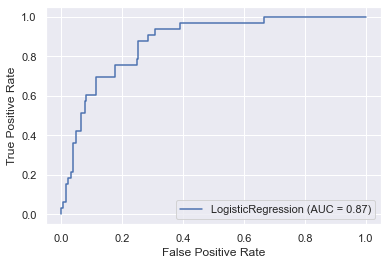

In [512]:
plot_roc_curve(lr, X_test, y_test)  
plt.show() 

#### Comparison:

In [513]:
0.87581 > 0.86977

True

From the above, we could see that Logistic model without penalty actually performs better than the one with penalty. So, we will store the first testing score.

In [514]:
result.append({"Model": "Logistic", "Test_Score": 0.87581})

## 4. SDG Classifier

In [515]:
from sklearn.linear_model import SGDClassifier

In [516]:
sgd = SGDClassifier(penalty=None)
trainS, testS = MCtraintest(500,X,y,sgd,0.20)
print("Mean training score:",np.mean(trainS).round(5))
print("Mean testing score:",np.mean(testS).round(5))

Mean training score: 0.84759
Mean testing score: 0.84341


In [517]:
result.append({"Model": "SDG", "Test_Score": np.mean(testS).round(5)})

## 5. SVM

In [518]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [519]:
cRange = [0.1,0.25, 0.5, 0.75, 0.8,0.9,1.0,1.1,1.2,1.3,1.3,1.5,2.0]
gRange = [0.0001,0.001, 0.005,0.1,0.2,0.5,1.0,1.5,2.0]

In [520]:
param_grid = {"kernel":["linear","rbf"],"C":cRange,"gamma": gRange}
shuffle_split = ShuffleSplit(test_size=0.2, n_splits=25)

In [526]:
svc_rbf = SVC()
grid_search = GridSearchCV(svc_rbf,param_grid,cv=shuffle_split,return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=25, random_state=None, test_size=0.2, train_size=None),
             estimator=SVC(),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1.0, 1.1, 1.2,
                               1.3, 1.3, 1.5, 2.0],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.5, 1.0,
                                   1.5, 2.0],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [527]:
grid_search.best_estimator_

SVC(C=1.2, gamma=1.5)

In [528]:
result_df = pd.DataFrame(grid_search.cv_results_)
result_df = result_df[["rank_test_score","mean_test_score","param_C","param_gamma","param_kernel"]]
result_df.sort_values("rank_test_score")

,rank_test_score,mean_test_score,param_C,param_gamma,param_kernel
159,1,0.880233,1.2,1.5,rbf
215,2,0.880000,1.5,2,rbf
141,3,0.879767,1.1,1.5,rbf
177,4,0.879535,1.3,1.5,rbf
195,4,0.879535,1.3,1.5,rbf
...,...,...,...,...,...
15,192,0.848837,0.1,1.5,rbf
149,231,0.848605,1.2,0.005,rbf
203,232,0.848372,1.5,0.005,rbf
185,232,0.848372,1.3,0.005,rbf


In [529]:
best_svc = SVC(kernel="rbf",C=1.2, gamma=1.5)
best_svc.fit(X_train, y_train)
y_pred = best_svc.predict(X_test)

In [530]:
svc_test = accuracy_score(y_test, y_pred).round(5)
print("Mean training accuracy: ", best_svc.score(X_train,y_train).round(5))
print("Mean testing accuracy: ", svc_test)

Mean training accuracy:  0.98252
Mean testing accuracy:  0.88372


In [531]:
cmat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cmat.ravel()
cmat

array([[179,   3],
       [ 22,  11]])

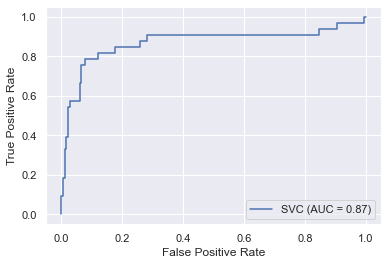

In [532]:
plot_roc_curve(best_svc, X_test, y_test)  
plt.show() 

In [533]:
result.append({"Model": "SVC_rbf", "Test_Score": svc_test})

## 6. Decision Tree

In [365]:
from sklearn.tree import DecisionTreeClassifier

In [366]:
param_grid = {"max_depth": [1,2,3,4,5,10,15,20,25,50]}

In [367]:
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree,param_grid,cv=shuffle_split,return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=25, random_state=None, test_size=0.2, train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25, 50]},
             return_train_score=True)

In [368]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [369]:
result_df = pd.DataFrame(grid_search.cv_results_)
result_df = result_df[["rank_test_score","mean_test_score","param_max_depth"]]
result_df

,rank_test_score,mean_test_score,param_max_depth
0,10,0.853023,1
1,1,0.878605,2
2,2,0.874651,3
3,3,0.873023,4
4,4,0.870930,5
5,5,0.864651,10
6,6,0.861395,15
7,7,0.860698,20
8,9,0.855814,25
9,8,0.856047,50


In [370]:
best_tree = DecisionTreeClassifier(max_depth=2)
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)

In [371]:
tree_test = accuracy_score(y_test, y_pred).round(5)
print("Mean training accuracy: ", best_tree.score(X_train,y_train).round(5))
print("Mean testing accuracy: ", tree_test)

Mean training accuracy:  0.88811
Mean testing accuracy:  0.86977


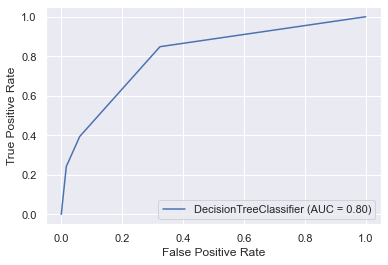

In [372]:
plot_roc_curve(best_tree, X_test, y_test)  
plt.show()

              feature  importance
0     volatileAcidity    0.000000
1          citricAcid    0.000000
2           chlorides    0.000000
3   freeSulfurDioxide    0.000000
4  totalSulfurDioxide    0.000000
5           sulphates    0.188772
6             alcohol    0.811228


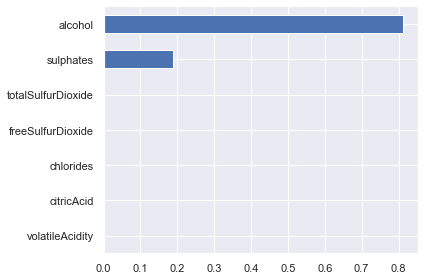

In [373]:
importances = best_tree.feature_importances_

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [534]:
result.append({"Model": "DecisionTree", "Test_Score": tree_test})

# Ensemble Learning Algorithms

Now, we could use several ensemble learning algorithms to improve our model performances:

## 7. Bagging (Bootstrap Sampling)

We will train an ensemble of 1000 Decision Tree Classifiers, and each is trained on 429 (half training) instances randomly sampled with replacement in the training set. This could create a relatively larger bias, but lower variance, and thereby improve the performance.

In [377]:
from sklearn.ensemble import BaggingClassifier

In [380]:
X_train.shape[0]/2

429.0

In [379]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=1000,
    max_samples=429,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [381]:
bagging_test = accuracy_score(y_test, y_pred).round(5)
print("Mean training accuracy: ", bag_clf.score(X_train,y_train).round(5))
print("Mean testing accuracy: ", bagging_test)

Mean training accuracy:  0.9697
Mean testing accuracy:  0.90233


In [535]:
result.append({"Model": "BaggingClf", "Test_Score": bagging_test})

## 8. Random Forest (Bagging)

In [383]:
from sklearn.ensemble import RandomForestClassifier

In [423]:
param_grid = {"max_depth": [10,15,20,25],"max_features":[1,2,3,4,5],"n_estimators":[100]}

In [438]:
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest,param_grid,cv=10,return_train_score=True,n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': [100]},
             return_train_score=True)

In [439]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, max_features=2)

In [440]:
result_df = pd.DataFrame(grid_search.cv_results_)
result_df = result_df[["rank_test_score","mean_test_score","param_max_depth","param_max_features"]]
result_df.head()

,rank_test_score,mean_test_score,param_max_depth,param_max_features
0,20,0.888140,10,1
1,5,0.900944,10,2
2,17,0.896306,10,3
3,4,0.900999,10,4
4,11,0.897510,10,5


In [441]:
best_forest = RandomForestClassifier(max_depth=15,max_features=2,n_estimators=100)
best_forest.fit(X_train, y_train)
y_pred = best_forest.predict(X_test)

In [442]:
forest_test = accuracy_score(y_test, y_pred).round(5)
print("Mean training accuracy: ", best_forest.score(X_train,y_train).round(5))
print("Mean testing accuracy: ", forest_test)

Mean training accuracy:  1.0
Mean testing accuracy:  0.92093


In [443]:
cmat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cmat.ravel()
cmat

array([[179,   3],
       [ 14,  19]])

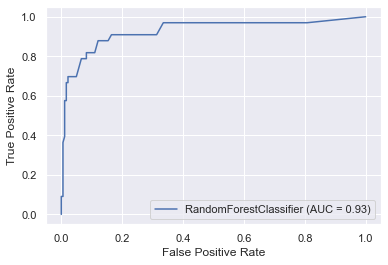

In [444]:
plot_roc_curve(best_forest, X_test, y_test)  
plt.show()

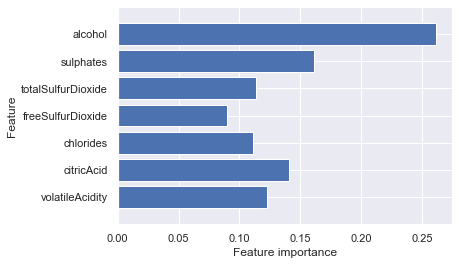

In [445]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(best_forest)

In [536]:
result.append({"Model": "RandomForest", "Test_Score": forest_test})

## 9. Voting Classifier

We will combine best Random Forest Classifier, the best SVC, and Linear Discrimant model.

In [538]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(max_depth=15, n_estimators=100, max_features=2)
svc = SVC(kernel="rbf",C=1.2, gamma=1.5)
lda = LinearDiscriminantAnalysis()

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('svc', svc), ('lda', lda)],
    voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=15,
                                                     max_features=2)),
                             ('svc', SVC(C=1.2, gamma=1.5)),
                             ('lda', LinearDiscriminantAnalysis())])

In [541]:
for clf in (rf,svc,lda,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred).round(5))

RandomForestClassifier 0.92558
SVC 0.88372
LinearDiscriminantAnalysis 0.86047
VotingClassifier 0.90233


In [542]:
result.append({"Model": "Voting Classifier", "Test_Score": 0.9007})

## 10. Gradient Boost

In [543]:
from sklearn.ensemble import GradientBoostingClassifier

In [606]:
gb_clf = GradientBoostingClassifier(max_depth=3,n_estimators=500)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500)

In [607]:
y_pred = gb_clf.predict(X_test)
gb_test = accuracy_score(y_test, y_pred).round(5)
print("Mean training accuracy: ", gb_clf.score(X_train,y_train).round(5))
print("Mean testing accuracy: ", gb_test)

Mean training accuracy:  1.0
Mean testing accuracy:  0.93488


In [608]:
cmat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cmat.ravel()
cmat

array([[176,   6],
       [  8,  25]])

In [581]:
result.append({"Model": "GradientBoost", "Test_Score": gb_test})

# V. Performance Evaluation

In [582]:
result_df = pd.DataFrame(result)

In [583]:
result_df.sort_values("Test_Score", ascending=False)

,Model,Test_Score
9,GradientBoost,0.93488
7,RandomForest,0.92093
6,BaggingClf,0.90233
8,Voting Classifier,0.90070
4,SVC_rbf,0.88372
2,Logistic,0.87581
5,DecisionTree,0.86977
1,Linear Discriminant,0.86605
0,Naive Bayes,0.84353
3,SDG,0.84341


From above, Gradient Boost gives the best classification performance.

# VI. Testing on Unseen Data

In [646]:
scaler = StandardScaler()
X_unseen = scaler.fit_transform(X_unseen)

#### Gradient Boost

In [664]:
gb_clf = GradientBoostingClassifier(max_depth=3,n_estimators=500)
gb_clf.fit(X, y)

GradientBoostingClassifier(n_estimators=500)

In [671]:
print("Mean training accuracy: ", gb_clf.score(X,y).round(5))
print("Mean testing accuracy: ", gb_clf.score(X_unseen,y_unseen).round(5))

Mean training accuracy:  1.0
Mean testing accuracy:  0.86872


#### Random Forest

In [672]:
rf = RandomForestClassifier(max_depth=15,max_features=2,n_estimators=100)
rf.fit(X, y)

RandomForestClassifier(max_depth=15, max_features=2)

In [673]:
print("Mean training accuracy: ", rf.score(X,y).round(5))
print("Mean testing accuracy: ", rf.score(X_unseen,y_unseen).round(5))

Mean training accuracy:  1.0
Mean testing accuracy:  0.90223


#### Bagging

In [674]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=1000,
    max_samples=429,bootstrap=True,n_jobs=-1)
bag_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=429,
                  n_estimators=1000, n_jobs=-1)

In [675]:
print("Mean training accuracy: ", bag_clf.score(X,y).round(5))
print("Mean testing accuracy: ", bag_clf.score(X_unseen,y_unseen).round(5))

Mean training accuracy:  0.96365
Mean testing accuracy:  0.89385
